# spear phishing using DT and LR

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'E:\Final year project\Emails.csv')

In [3]:
df.rename(columns={'spam':'spear'},inplace=True)

In [4]:
df.sample(5)

,text,spear
796,Subject: we owe you lots of money dear applic...,1
2223,"Subject: london , new york , houston , financi...",0
3025,Subject: yesterday i enjoyed meeting you both...,0
3155,"Subject: vince , here is why analytical var d...",0
3965,Subject: candidate vince : here is the resum...,0


In [5]:
df.shape

(5728, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spear   5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
df.sample(5)

,text,spear
3661,"Subject: lunch with it and credit tanya , ca...",0
1747,Subject: re : exotica ( second request ) plea...,0
2017,"Subject: re : anita dupont resume sheila , n...",0
1015,Subject: failure notice hi . this is the qmai...,1
1864,Subject: seminar mugs vince : can your secre...,0


In [8]:
# renaming the cols
df.rename(columns={'spear':'target'},inplace=True)
df.sample(5)

,text,target
2427,"Subject: re : new color printer sorry , don ...",0
5141,Subject: virus update : please read there are...,0
5383,Subject: re : recommendation of an outstanding...,0
7,Subject: save your money buy getting this thin...,1
2363,"Subject: ( no subject ) vince , here are the...",0


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,text,target
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [12]:
# missing values
df.isnull().sum()

text      0
target    0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

33

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5695, 2)

In [17]:
df.head()

,text,target
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [18]:
df['target'].value_counts()

0    4327
1    1368
Name: target, dtype: int64

In [19]:
# Data is imbalanced

In [20]:
import nltk

In [21]:
!pip install nltk

In [22]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,text,target,num_characters
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [25]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,text,target,num_characters,num_words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,9
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,5


<AxesSubplot:>

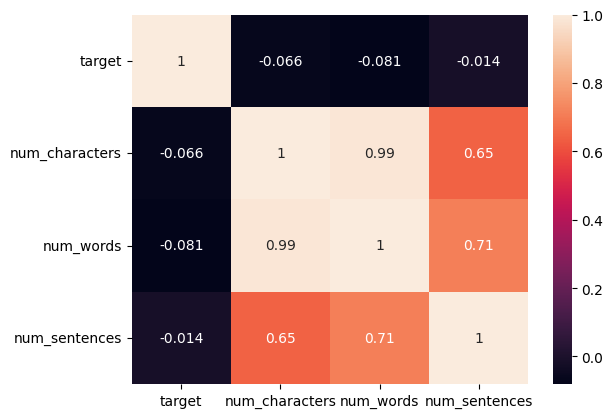

In [29]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [30]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [31]:
# prompt: import portstemmer

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [32]:
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [33]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [34]:
df['text'][10]

"Subject: las vegas high rise boom  las vegas is fast becoming a major metropolitan city ! 60 +  new high rise towers are expected to be built on and around the las vegas strip  within the next 3 - 4 years , that ' s 30 , 000 + condominiums !  this boom has just begun ! buy first . . . early phase ,  pre - construction pricing is now available on las vegas high rises including  trump , cosmopolitan , mgm , turnberry , icon , sky , among others .  join the interest list :  http : / / www . verticallv . com  message has been sent to you by realty one highrise . learn more at www . verticallv . comif you  wish to be excluded from future mailings , please reply with the word remove in  the subject line . "

In [35]:
df['transformed_text'] = df['text'].apply(transform_text)

In [36]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,9,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,5,subject money get softwar cd softwar compat gr...


In [37]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [38]:
len(spam_corpus)

174630

In [39]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [40]:
len(ham_corpus)

702991

In [41]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000)

In [42]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [43]:
X.shape

(5695, 5000)

In [44]:
y = df['target'].values

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [50]:
clfs = {
    'DT': dtc,
    'LR': lrc,
}

In [51]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [52]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  DT
Accuracy -  0.9236172080772608
Precision -  0.8048048048048048
For  LR
Accuracy -  0.9736611062335382
Precision -  0.9744525547445255


In [53]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [54]:
performance_df

,Algorithm,Accuracy,Precision
1,LR,0.973661,0.974453
0,DT,0.923617,0.804805


In [55]:
import pickle
pickle.dump(dtc,open('dtc.pkl','wb'))
pickle.dump(lrc,open("lrc.pkl",'wb'))

In [56]:
with open('dtc.pkl','rb') as f:
    model_dtc = pickle.load(f)

In [57]:
with open("lrc.pkl",'rb') as f:
    model_lrd = pickle.load(f)

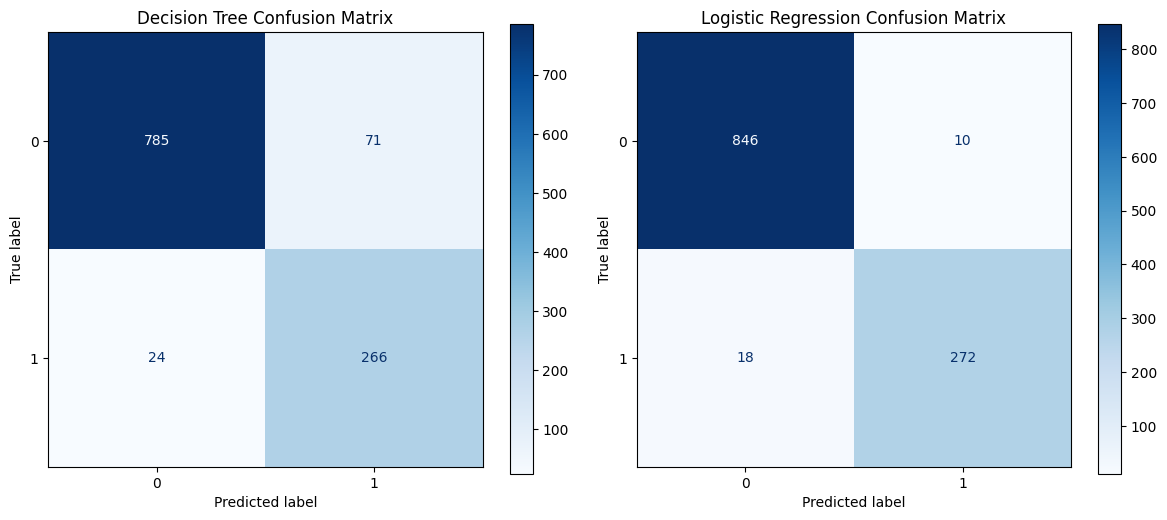

In [64]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import pickle

# Load the dataset
df = pd.read_csv(r'E:\Final year project\Emails.csv')
df.rename(columns={'spam':'spear'}, inplace=True)

# Preprocessing the text data
# Define a function to transform the text data
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

df['transformed_text'] = df['text'].apply(transform_text)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['transformed_text'], df['spear'], test_size=0.2, random_state=42)

# Vectorizing the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5)
dt_classifier.fit(X_train_tfidf, y_train)

# Train Logistic Regression classifier
lr_classifier = LogisticRegression(solver='liblinear', penalty='l1')
lr_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_dtc = dt_classifier.predict(X_test_tfidf)
y_pred_lrc = lr_classifier.predict(X_test_tfidf)

# Confusion matrices
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cm_lrc = confusion_matrix(y_test, y_pred_lrc)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp_dtc = ConfusionMatrixDisplay(confusion_matrix=cm_dtc, display_labels=dt_classifier.classes_)
disp_dtc.plot(ax=axes[0], cmap='Blues', xticks_rotation='horizontal')
axes[0].set_title('Decision Tree Confusion Matrix')

disp_lrc = ConfusionMatrixDisplay(confusion_matrix=cm_lrc, display_labels=lr_classifier.classes_)
disp_lrc.plot(ax=axes[1], cmap='Blues', xticks_rotation='horizontal')
axes[1].set_title('Logistic Regression Confusion Matrix')

plt.tight_layout()
plt.show()

In [65]:
from sklearn.metrics import classification_report

# Generate classification reports
report_dtc = classification_report(y_test, y_pred_dtc)
report_lrc = classification_report(y_test, y_pred_lrc)

# Print classification reports
print("Decision Tree Classification Report:")
print(report_dtc)

print("\nLogistic Regression Classification Report:")
print(report_lrc)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       856
           1       0.79      0.92      0.85       290

    accuracy                           0.92      1146
   macro avg       0.88      0.92      0.90      1146
weighted avg       0.92      0.92      0.92      1146


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       856
           1       0.96      0.94      0.95       290

    accuracy                           0.98      1146
   macro avg       0.97      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

